Part 1:
Preprocessing the dataset - IoTID20
Statistical Feature Selection using Pearson Correlation Coefficient

In [1]:
import pandas as pd #dataframe operations

In [2]:
df = pd.read_csv('\Hybrid Metaheuristic Feature Selection\Dataset\IoT ID 20.csv',low_memory=False)
#read dataset. Use your own dataset path here

In [3]:
df

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


In [4]:
df.columns

Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_

In [5]:
df.isnull().sum()

Flow_ID     0
Src_IP      0
Src_Port    0
Dst_IP      0
Dst_Port    0
           ..
Idle_Max    0
Idle_Min    0
Label       0
Cat         0
Sub_Cat     0
Length: 86, dtype: int64

In [6]:
df['Label'].value_counts() #find the total count of the target variable

Label
Anomaly    585710
Normal      40073
Name: count, dtype: int64

In [7]:
#manually remove the irrelevant columns
df.drop(['Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags','FIN_Flag_Cnt','ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_Flag_Cnt',],axis=1,inplace=True)

In [8]:
df.dropna(inplace=True) #remove the possible na and nan values

In [9]:
df

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


In [10]:
#encode the entire data to numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x = df.columns
for i in x:
    df[i] = df[i].astype(str)
    df[i] = le.fit_transform(df[i])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 63 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Flow_ID            625783 non-null  int32
 1   Src_IP             625783 non-null  int32
 2   Src_Port           625783 non-null  int32
 3   Dst_IP             625783 non-null  int32
 4   Dst_Port           625783 non-null  int32
 5   Protocol           625783 non-null  int32
 6   Timestamp          625783 non-null  int32
 7   Flow_Duration      625783 non-null  int32
 8   Tot_Fwd_Pkts       625783 non-null  int32
 9   Tot_Bwd_Pkts       625783 non-null  int32
 10  TotLen_Fwd_Pkts    625783 non-null  int32
 11  TotLen_Bwd_Pkts    625783 non-null  int32
 12  Fwd_Pkt_Len_Max    625783 non-null  int32
 13  Fwd_Pkt_Len_Min    625783 non-null  int32
 14  Fwd_Pkt_Len_Mean   625783 non-null  int32
 15  Fwd_Pkt_Len_Std    625783 non-null  int32
 16  Bwd_Pkt_Len_Max    625783 non-null  in

In [12]:
y = df['Label']
X = df.drop(['Label'],axis=1)

In [13]:
# The next step is to split training and testing data. For this we will use sklearn function train_test_split().
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state=1)

In [14]:
X_train.shape, y_train.shape ,X_test.shape , y_test.shape

((438048, 62), (438048,), (187735, 62), (187735,))

In [15]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X)
features = scaler.transform(X)

In [16]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [17]:
Counter(y) #before smote

Counter({0: 585710, 1: 40073})

In [18]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [19]:
Counter(y_res) #after smote

Counter({0: 585710, 1: 585710})

In [20]:
y = y_res
X = X_res

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state=1)

In [22]:
X_train.shape, y_train.shape ,X_test.shape , y_test.shape

((819994, 62), (819994,), (351426, 62), (351426,))

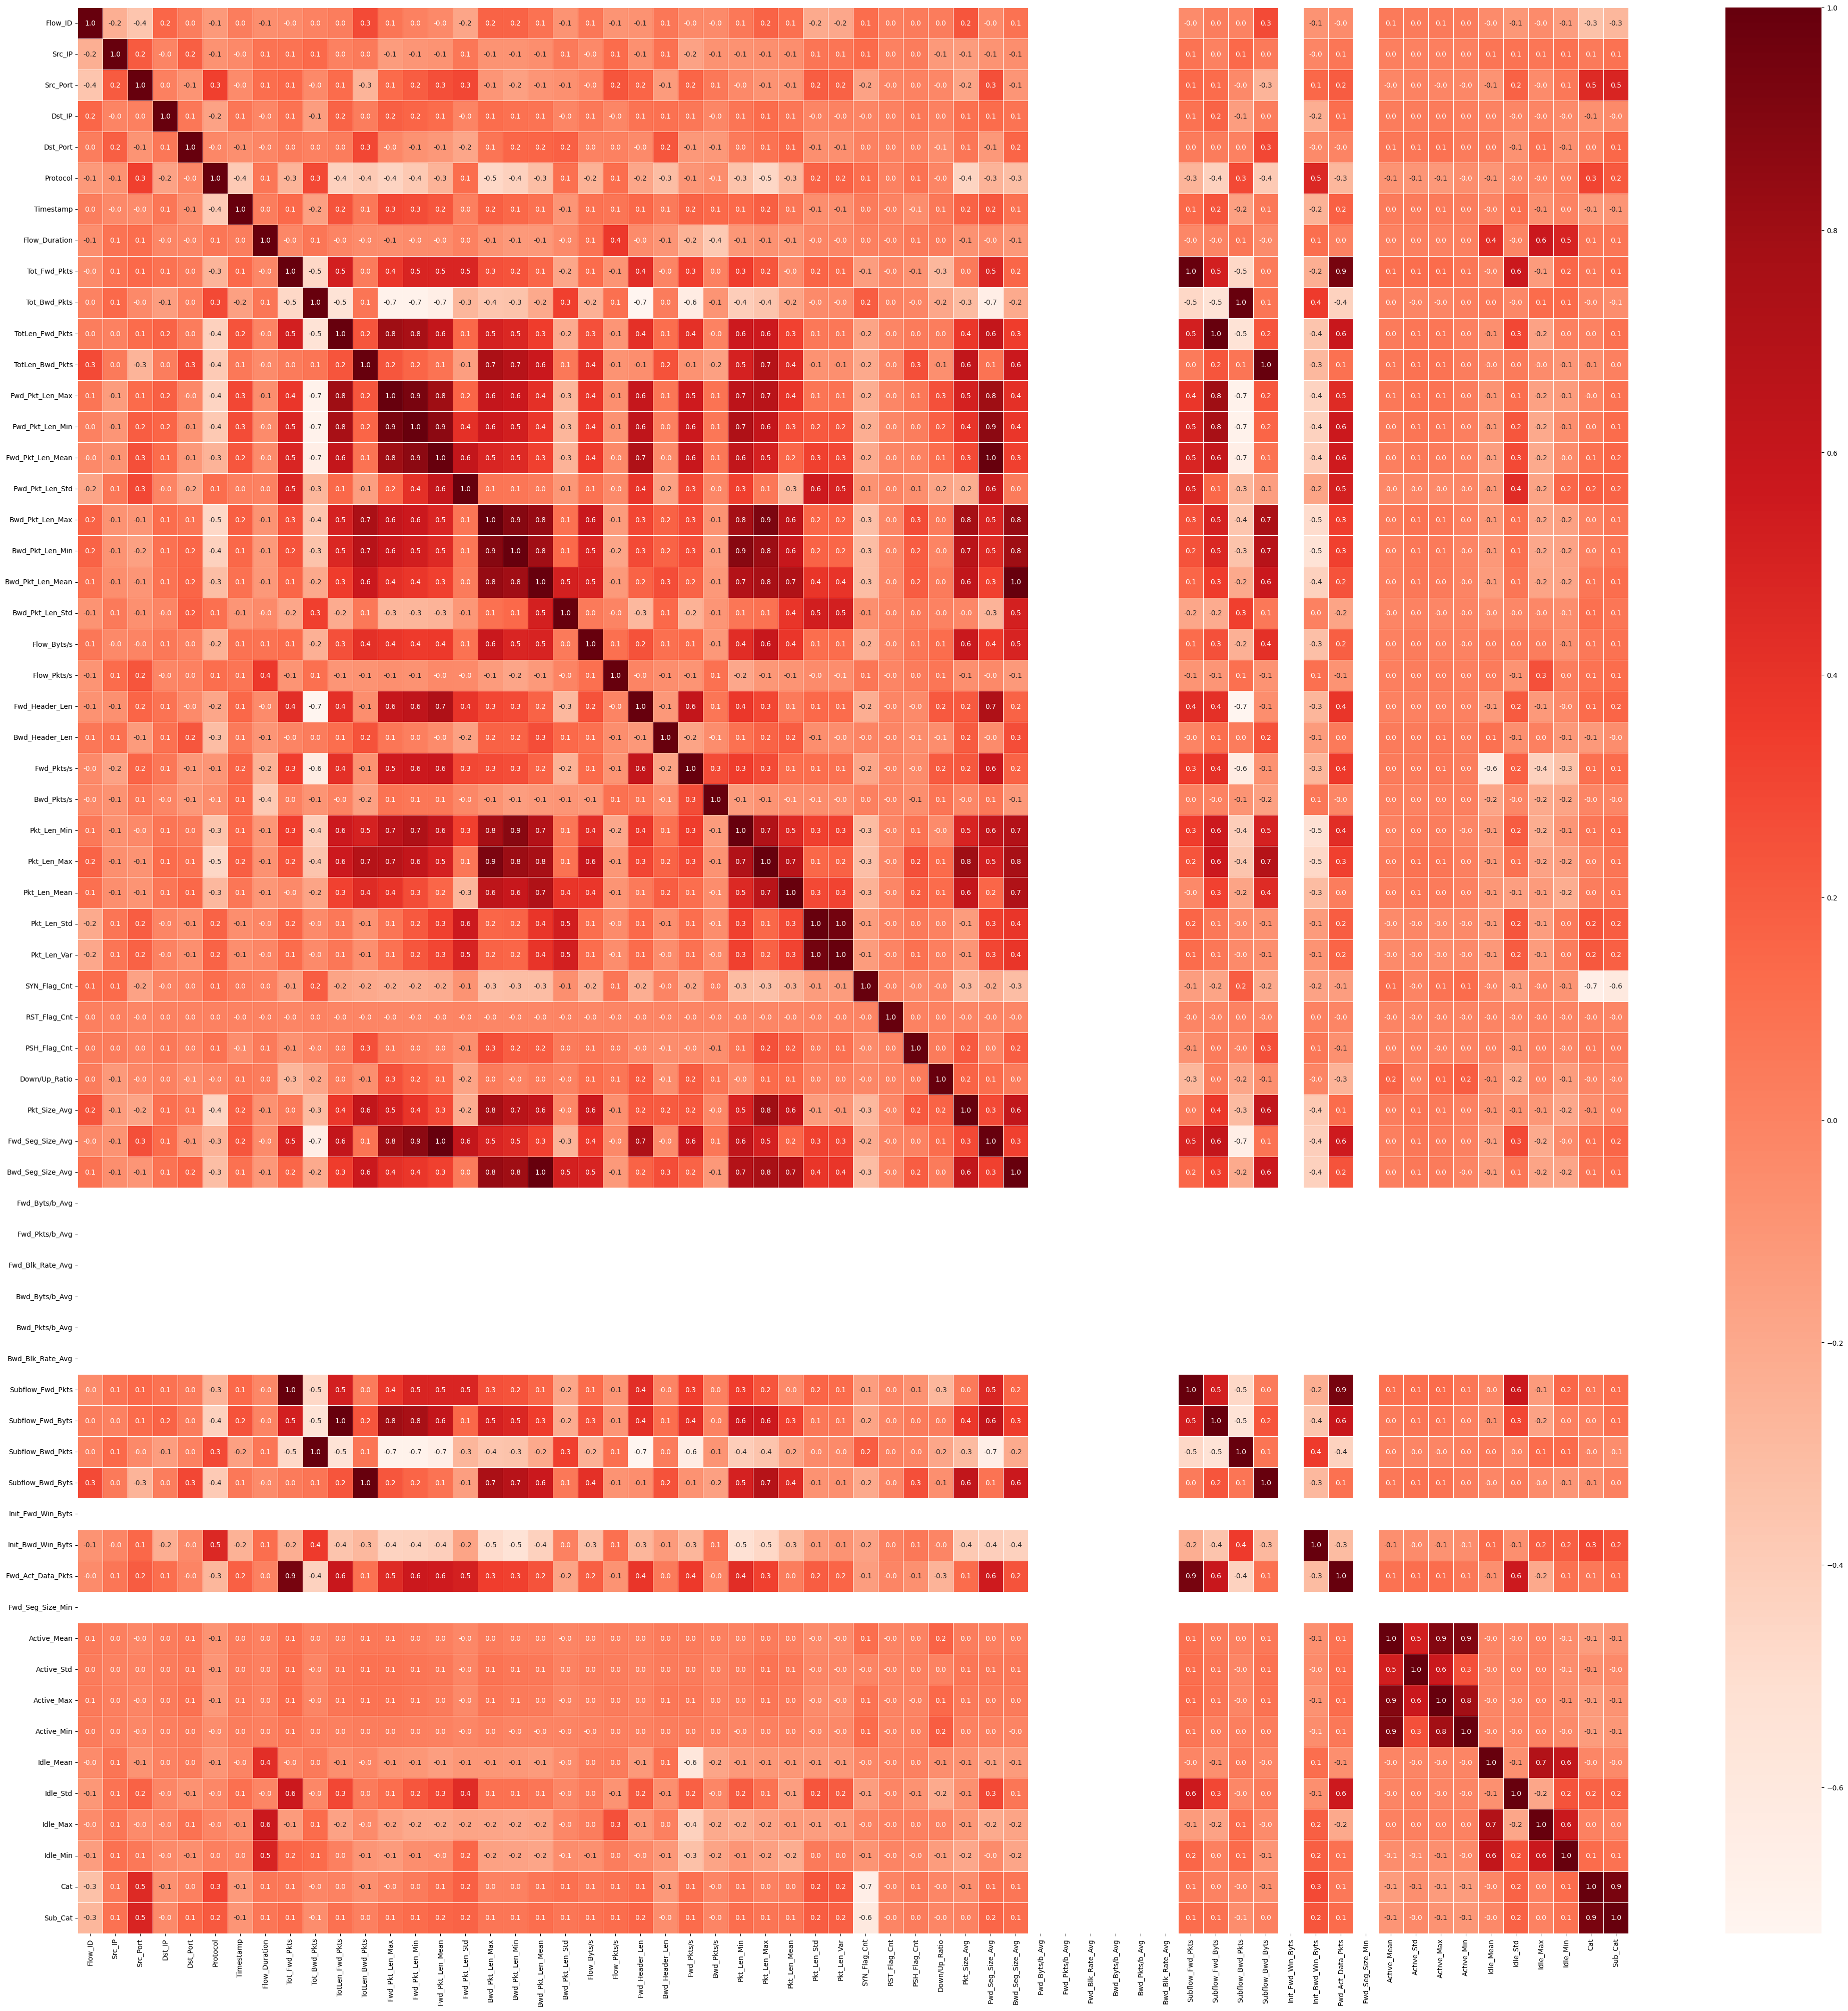

((819994, 43), (351426, 43), (819994,), (351426,))

In [23]:
#implementing the Pearson Correlation Coefficient feature selection
import seaborn as sns
import matplotlib.pyplot as plt

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Calculate correlation matrix
corrmat = X_train_df.corr(method='pearson')
plt.figure(figsize=(50,50))
sns.heatmap(corrmat,annot=True,linewidth=.5,fmt=".1f",cmap=plt.cm.Reds)
plt.show()

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

corr_features = correlation(pd.DataFrame(X_train),0.75)
len(set(corr_features))

corr_features

X_train_corr=pd.DataFrame(X_train).drop(corr_features,axis=1)
x_test_corr=pd.DataFrame(X_test).drop(corr_features,axis=1)

X_train_corr.shape,x_test_corr.shape,y_train.shape,y_test.shape

In [24]:
X_train = X_train_corr
X_test = x_test_corr

In [42]:
print(len(X_train.columns))
X_train.columns    


43


Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s',
       'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s',
       'Pkt_Len_Mean', 'Pkt_Len_Std', 'SYN_Flag_Cnt', 'RST_Flag_Cnt',
       'PSH_Flag_Cnt', 'Down/Up_Ratio', 'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg',
       'Fwd_Blk_Rate_Avg', 'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg',
       'Bwd_Blk_Rate_Avg', 'Init_Fwd_Win_Byts', 'Init_Bwd_Win_Byts',
       'Fwd_Seg_Size_Min', 'Active_Mean', 'Active_Std', 'Idle_Mean',
       'Idle_Std', 'Idle_Max', 'Idle_Min', 'Cat'],
      dtype='object')

In [41]:
print(len(X.columns))
X.columns

62


Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Fwd_Header_Len',
       'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min',
       'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var',
       'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'Down/Up_Ratio',
       'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg',
       'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg',
       'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg',
       'Subflow_Fwd_Pkts', 'Subflow_Fwd_Byts', 'Subflow_Bwd_Pkts',
       'Subflow_Bwd_Byts', 'Init_Fwd_Win_Byts', 'Init_Bwd_Win_Byts',
       'Fwd_Act_Data_Pkts', 'Fwd_Seg_Size_Min', 'Active_

In [48]:
print(len(y_train))

819994


In [67]:
data = df[X_train.columns]

In [68]:
data = pd.concat([data,df['Label']],axis=1)

In [75]:
data

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Init_Bwd_Win_Byts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,Label
0,12446,25883,2,203,2,1,3496,10117,1,0,...,0,0,0,0,15418,0,10017,9144,2,0
1,22760,34617,1278,200,727,2,3664,7491,1,14,...,210,0,0,0,6857,10148,6217,316,0,0
2,12691,25886,6121,200,1027,2,2082,1790,0,21,...,392,0,0,0,14878,253,9636,8714,4,0
3,12704,25886,6207,200,1027,2,791,2084,0,14,...,392,0,0,0,3092,0,1995,1912,2,0
4,611,25881,3113,317,10,1,1040,2125,31,0,...,0,0,0,0,15529,253,10191,9219,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,62081,25889,6869,233,1015,1,3443,4328,1,0,...,0,0,0,0,7091,0,4255,3977,2,0
625779,18760,30623,4523,200,727,2,3637,2435,0,14,...,210,0,0,0,3639,0,2348,2229,0,0
625780,12695,25886,6134,200,1027,2,2285,10334,1,0,...,1797,0,0,0,15620,0,10191,9299,4,0
625781,12682,25883,11200,203,392,2,2872,3793,31,0,...,392,0,0,0,1526,20579,1205,758,3,1


In [79]:
data.to_csv("E:\Hybrid Metaheuristic Feature Selection\Dataset\IoT ID 20_StatisticalFS.csv",index=False)